In [4]:
import os
import pandas as pd

path = "/Users/arbaaz/Downloads/break/ds"
os.listdir(path)

['y_train.parquet',
 'X_train.parquet',
 '.gitignore',
 'X_test.reduced.parquet',
 'y_test.reduced.parquet']

In [5]:
X_train_path = path+"/X_train.parquet"
df_x = pd.read_parquet(X_train_path)
df_x.head()

value  period
id time                  
0  0    -0.005564       0
   1     0.003705       0
   2     0.013164       0
   3     0.007151       0
   4    -0.009979       0

In [6]:
df_x.describe()

,value,period
count,2.371573e+07,2.371573e+07
mean,5.728306e-04,2.633960e-01
std,9.528225e-02,4.404754e-01
min,-2.284821e+00,0.000000e+00
25%,-4.524159e-03,0.000000e+00
50%,8.761704e-05,0.000000e+00
75%,4.992070e-03,1.000000e+00
max,4.125000e+02,1.000000e+00


In [7]:
df_x.groupby("id").size().describe()

count    10001.000000
mean      2371.336266
std        482.645935
min       1258.000000
25%       1991.000000
50%       2369.000000
75%       2743.000000
max       3478.000000
dtype: float64

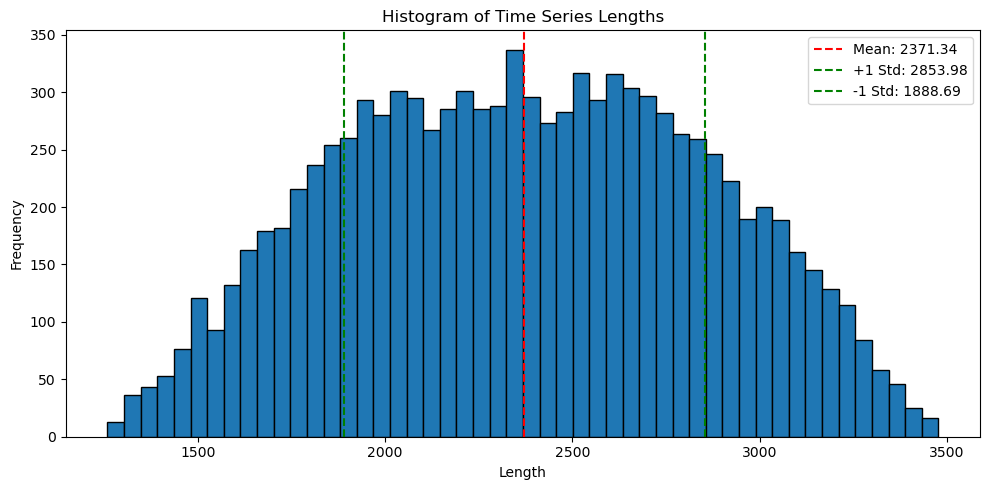

In [8]:
import matplotlib.pyplot as plt

def plot_length_histogram(X, bins=50):
    lengths = X.groupby('id').size()
    mean = lengths.mean()
    std = lengths.std()

    plt.figure(figsize=(10, 5))
    plt.hist(lengths, bins=bins, edgecolor='black')
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='g', linestyle='--', label=f'+1 Std: {mean + std:.2f}')
    plt.axvline(mean - std, color='g', linestyle='--', label=f'-1 Std: {mean - std:.2f}')
    plt.title("Histogram of Time Series Lengths")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_length_histogram(df_x)

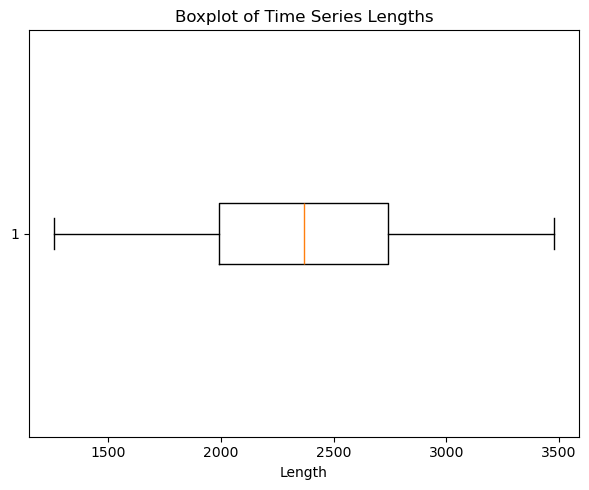

In [9]:
def plot_length_boxplot(X):
    lengths = X.groupby('id').size()

    plt.figure(figsize=(6, 5))
    plt.boxplot(lengths, vert=False)
    plt.title("Boxplot of Time Series Lengths")
    plt.xlabel("Length")
    plt.tight_layout()
    plt.show()

plot_length_boxplot(df_x)

In [10]:
df_x["period"].value_counts().sort_index()

period
0    17469105
1     6246629
Name: count, dtype: int64

In [11]:
df_x.groupby("id")["period"].value_counts().unstack(fill_value=0)

period,0,1
id,,
0,1351,294
1,2247,282
2,2333,515
3,2271,629
4,1657,456
...,...,...
9996,2160,554
9997,1780,363
9998,2483,907


In [12]:
df_x.groupby('time')['period'].value_counts()

time  period
0     0         10001
1     0         10001
2     0         10001
3     0         10001
4     0         10001
                ...  
3473  1             2
3474  1             1
3475  1             1
3476  1             1
3477  1             1
Name: count, Length: 4977, dtype: int64

In [14]:
df_x['period'].value_counts().sort_index() / 1e6

period
0    17.469105
1     6.246629
Name: count, dtype: float64

In [16]:
periods_summary = df_x.groupby('id')['period'].value_counts().unstack(fill_value=0)
periods_summary

period,0,1
id,,
0,1351,294
1,2247,282
2,2333,515
3,2271,629
4,1657,456
...,...,...
9996,2160,554
9997,1780,363
9998,2483,907


In [17]:
def period_stats_summary(per_series_counts):
    stats_0 = per_series_counts[0].describe()
    stats_1 = per_series_counts[1].describe()

    summary = pd.DataFrame({
        'Period 0': stats_0,
        'Period 1': stats_1
    })

    return summary


period_stats_summary(periods_summary)

,Period 0,Period 1
count,10001.000000,10001.00000
mean,1746.735826,624.60044
std,432.507524,215.98523
min,1000.000000,250.00000
25%,1368.000000,435.00000
50%,1749.000000,629.00000
75%,2119.000000,810.00000
max,2499.000000,999.00000


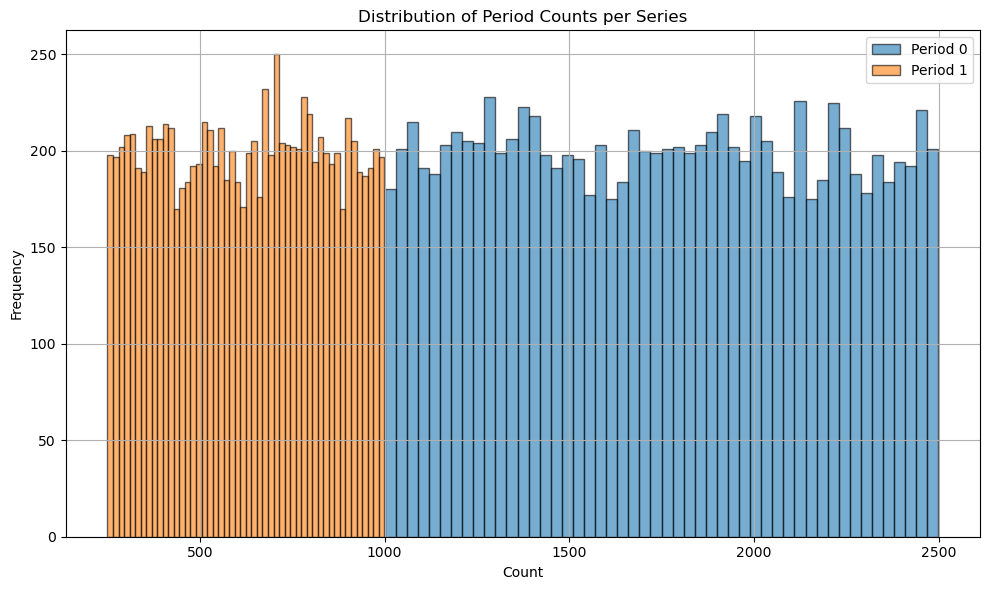

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_period_count_distribution(period_counts_df, plot_type="kde"):
    """
    Plots overlapping density or histogram plots for period 0 and period 1 counts.

    Args:
        period_counts_df (pd.DataFrame): DataFrame with columns [0, 1] or ['Period 0', 'Period 1']
                                          representing counts per series.
        plot_type (str): "kde" for density plot, "hist" for histogram.
    """
    # Rename columns if needed
    if 0 in period_counts_df.columns:
        period_counts_df = period_counts_df.rename(columns={0: 'Period 0', 1: 'Period 1'})
    
    plt.figure(figsize=(10, 6))

    if plot_type == "kde":
        sns.kdeplot(period_counts_df['Period 0'], fill=True, label='Period 0', linewidth=2)
        sns.kdeplot(period_counts_df['Period 1'], fill=True, label='Period 1', linewidth=2)
    elif plot_type == "hist":
        plt.hist(period_counts_df['Period 0'], bins=50, alpha=0.6, label='Period 0', edgecolor='black')
        plt.hist(period_counts_df['Period 1'], bins=50, alpha=0.6, label='Period 1', edgecolor='black')
    else:
        raise ValueError("plot_type must be either 'kde' or 'hist'")

    plt.title("Distribution of Period Counts per Series")
    plt.xlabel("Count")
    plt.ylabel("Density" if plot_type == "kde" else "Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_period_count_distribution(periods_summary, "hist")